In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df=web.DataReader('BHARTIARTL.NS',data_source='yahoo',start='2012-01-01', end='2021-06-09')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,320.352448,314.246552,316.312439,316.587891,2138824.0,300.193024
2012-01-03,330.957397,317.001068,319.066986,329.304657,2303160.0,312.251221
2012-01-04,327.789673,317.230621,326.091034,318.011078,3182719.0,301.542450
2012-01-05,320.260620,314.108826,318.607880,316.220642,3155922.0,299.844849
2012-01-06,314.016998,301.437958,314.016998,303.503845,8610440.0,287.786530
...,...,...,...,...,...,...
2021-06-03,533.400024,528.500000,530.000000,532.049988,6174103.0,532.049988
2021-06-04,535.799988,531.200012,533.950012,532.700012,4788898.0,532.700012
2021-06-07,541.000000,533.000000,534.000000,536.450012,9496183.0,536.450012


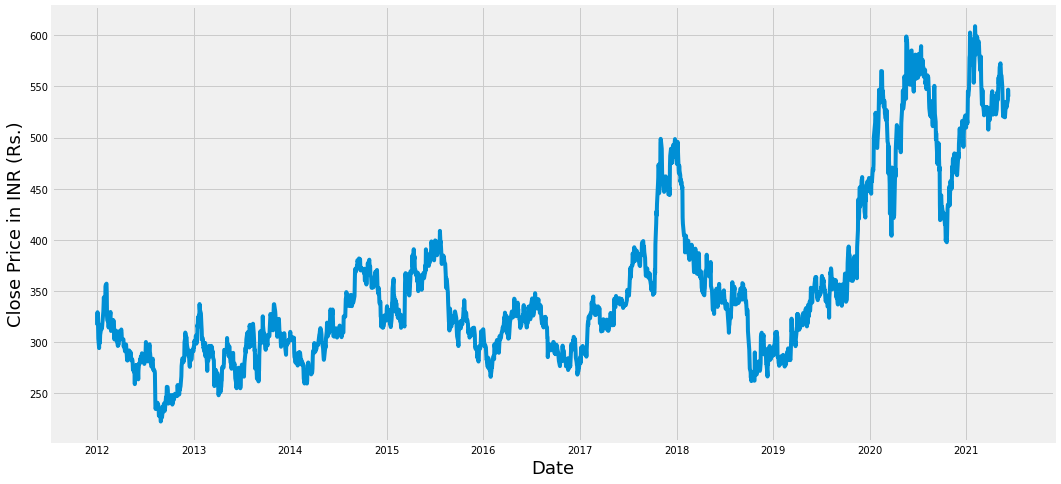

In [ ]:
plt.figure(figsize=(16,8))
plt.title=('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in INR (Rs.)',fontsize=18)
plt.show()

In [ ]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

1858

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data

array([[0.24357989],
       [0.27649288],
       [0.24726332],
       ...,
       [0.81261754],
       [0.8394049 ],
       [0.82180547]])

In [ ]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1798, 60, 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=2)

Epoch 1/2
1798/1798 [==============================] - 56s 21ms/step - loss: 0.0028
Epoch 2/2
1798/1798 [==============================] - 38s 21ms/step - loss: 8.3757e-04


In [ ]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [ ]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

24.67780909044989

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


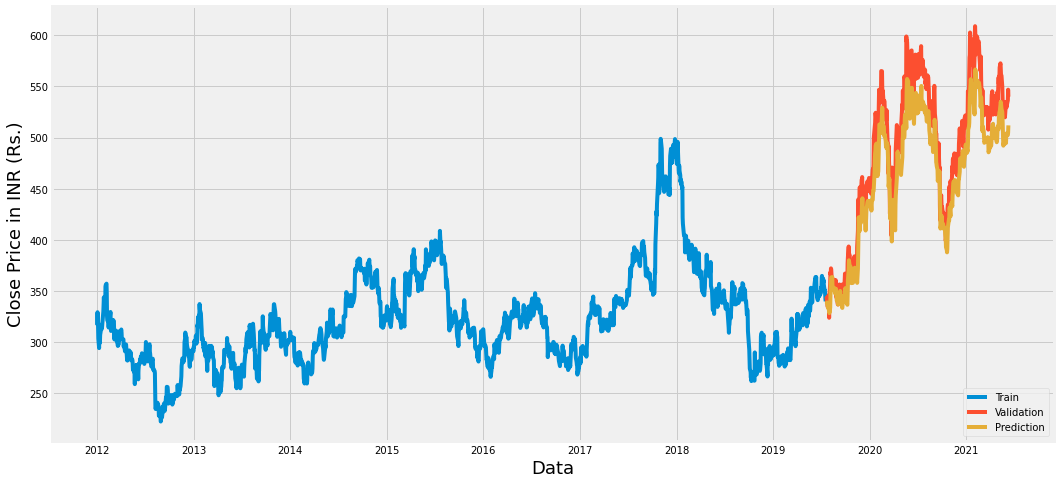

In [ ]:
train=data[0:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
# plt.title('Model')
plt.xlabel('Data',fontsize=18)
plt.ylabel('Close Price in INR (Rs.)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Validation', 'Prediction'], loc ='lower right')
plt.show()

In [ ]:
(valid[-15:])

,Close,Predictions
Date,,
2021-05-20,520.650024,498.650940
2021-05-21,530.950012,492.089264
2021-05-24,526.799988,496.764008
2021-05-25,526.099976,497.894196
2021-05-26,525.750000,497.955994
2021-05-27,519.799988,497.777191
2021-05-28,523.599976,494.177582
2021-05-31,534.900024,494.709900
2021-06-01,532.900024,501.997955


In [ ]:
import datetime
from tensorflow.keras.models import load_model
from pickle import load
today = datetime.date.today()
 
span2 = datetime.timedelta(days=2)
span1 = datetime.timedelta(days=1)
Prev_2_date=today-span2
Prev_1_date=today-span1
def predict(name,model,scaler): 
 quote=web.DataReader(name,data_source='yahoo',start='2012-01-01', end=(Prev_1_date))
 new_df=quote.filter(['Close'])
 last_60_days=new_df.iloc[-60:].values
 last_60_days_scaled=scaler.transform(last_60_days)
 X_test=[]
 X_test.append(last_60_days_scaled)
 X_test=np.array(X_test)
 X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
 pred_price=model.predict(X_test)
 pred_price=scaler.inverse_transform(pred_price)
 print(np.array(pred_price))

model=load_model("NIFTY50_model.h5")
scaler=load(open("NIFTY50_scaler.pkl","rb"))
predict('^CNXIT',model,scaler)

OSError: ignored